<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/1_Reading_Viewing_JPEGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Example Notebook Demonstrating the Reading and Viewing of JPEGs**

<i>August 17, 2020</i>

---

In [1]:
# -- mount google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# -- get file list (this may take some time)
srch = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                    "03-14", "*.jpeg")
flist = sorted(glob.glob(srch))

print("number of files is {0}".format(len(flist)))

number of files is 8608


In [6]:
# -- read the zeroth image into an array
img = plt.imread(flist[0])

In [7]:
# -- notice that it is 3-dimensional
print(img.shape)

(240, 320, 3)


In [ ]:
# -- also notice the data type
print(img.dtype)

uint8


In [8]:
# -- unit8 stands for "unsigned 8-bit integer" and it can take values between
#    0 and 2**8 - 1 = 255
print("min, max : {0}, {1}".format(img.min(), img.max()))

min, max : 0, 255


In [9]:
# -- notice also that for these images, there's only one "color" and so all 
#    three colors are the same (by printing out the top left 2x2 pixels)
img[:2, :2, :]

array([[[226, 226, 226],
        [227, 227, 227]],

       [[222, 222, 222],
        [229, 229, 229]]], dtype=uint8)

In [10]:
# -- so we really only need one color channel
img = img[:, :, 0]

In [11]:
# -- and we typically want to work with floating point data, so let's convert 
#    to float instead of uint8
img = img.astype(float)

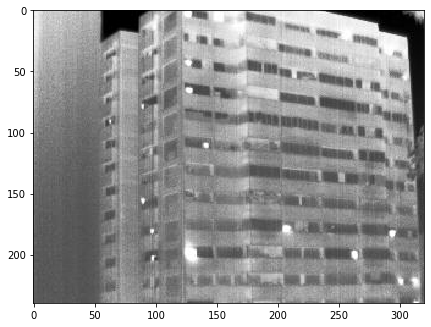

In [12]:
# -- now let's plot the image
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(img, cmap="gist_gray", interpolation="nearest")

In [13]:
# -- let's isolate those bright dots by finding all pixels brighter than some 
#    threshold (note, this is exactly the same way we got T/F arrays in DSTEP 
#    and MLPP, only this time the data is 2-dimensional)
thr = 240
brgt = img > thr

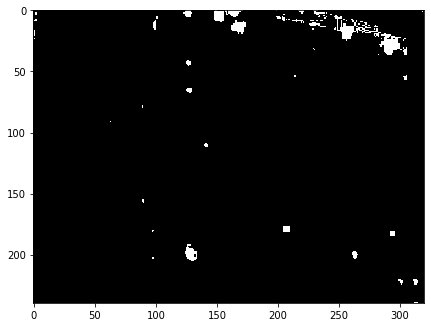

In [14]:
# -- and show them
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(brgt, cmap="gist_gray", interpolation="nearest")

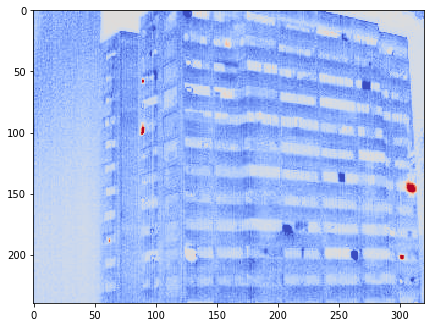

In [15]:
# -- which pixels got brighter between the 0th and 1000th image?
#    (red are pixels that got brighter, blue are pixels that got dimmer [see 
#     DSTEP class on color maps])
img1 = plt.imread(flist[1000])[:, :, 0].astype(float)
dimg = img1 - img

fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(dimg, cmap="coolwarm", clim=[-100, 100], interpolation="nearest")

In [16]:
# -- what time were these images taken?  We can use the image name in this case
ctime = os.path.split(flist[0])[1][-16:-8].replace("-", ":")
ctime1 = os.path.split(flist[1000])[1][-16:-8].replace("-", ":")

print("img0 creation time is {0}".format(ctime))
print("img1 creation time is {0}".format(ctime1))

img0 creation time is 00:00:03
img1 creation time is 02:47:21
